<a href="https://colab.research.google.com/github/WinnieAnyoso/housing_price_prediction/blob/master/Moringa_w7_ip_Anyoso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1) Defining the problem 
As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

###2) Metrics of success
Be able to create a model that will acurately predict the prices of houses according to the different provided metrics

###3) Context 
We have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months

**Dataset link**(http://bit.ly/IndependentProjectWeek7Dataset) 

**Dataset Glosary** 
- Id 
- price  - Price of the house
- bedrooms - Number of Bedrooms
- bathrooms - Number of Bathrooms
- sqft_living - Square feet area of living area
- sqft_lot  - Square feet area of parking Layout
- floors - Number of Floors
- waterfront - Whether waterfront is there or not
- view - Number of Views
- grade - Grades
- sqft_above
- sqft_basement - Square feet area off basement
- yr_built - Year the house is built
- yr_renovated - Year the house is renovated
- zipcode - zipcode os the house
- lat : Latitude of the house
- lon : Longitude of the house
- sqft_living15
- sqft_lot15

###4) Experimental design
1. Business Understanding: This should give a clear understanding of the data and business in question in order to make conclusive summaries and approaches in tackling the research problem at hand.

2. Reading the data: Reading our data with and aim to understand the variables and observations.

3. Checking our data: This to get details about the dataset, the number of records, the statistal summary,the datatypes in our dataset among others.

4. Tidying up the data (Data cleaning): This was to drop unnecesaary columns, delete duplicate records, get rid of any null values, merge dataframes if need be etc.

5. EDA, the data was analysed, visualized and conclusions were then drawn.

6. Implementing the solution using Regression Analysis(Mulilinear, Ridge, Quantile, ElasticNet, Lasso)

- Check of multicollinearity

- Start building the model

- Cross-validate the model

- Compute RMSE

- Create residual plots for your models, and assess their heteroscedasticity

using Bartlett’s test

- Perform appropriate regressions on the data including your justification

7. Challenge your solution by providing insights on how you can make improvements. Dataset

###5.Appropriatenes of the data
The data is  is up to date and relevant in making conclusive analyses.

# 1.Import Libraries


In [170]:
# Import Libraries

# Analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
# We will use the python package statsmodels for Quantile Regression
import statsmodels.formula.api as smf
from scipy import stats

# Other libraries
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

#2.Loading datssets 

In [171]:
# loading datssets 
df = pd.read_csv('house_data.csv')
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [172]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [173]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [174]:
# data exploration
df.shape

(21613, 20)

In [175]:
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [176]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [177]:
df.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [178]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


#3.Tidying up the data 

In [179]:
# Data cleaning / tidying up the data 

df.isnull().sum()



id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- There are no null values in the dataset

In [180]:
# dropping irrelevant columns 
df= df.drop(['id'], axis= 1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [181]:

# Check for duplicated data
df.duplicated().sum()

5

- There are 5 duplicated records

In [182]:
a =df.drop_duplicates(keep = 'first')
a

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [183]:
# confirming that the duplicates were dropped 
a.duplicated().any()

False

- Duplicated records have been dropped 


In [184]:
# checking for the new shape of the dataframe 
a.shape

(21608, 19)

#4.EDA
## Univariate analysis 


In [185]:
print(a['bedrooms'].value_counts())
print(a['bathrooms'].value_counts())
print(a['floors'].value_counts())
print(a['waterfront'].value_counts())
print(a['condition'].value_counts())
print(a['grade'].value_counts())
print(a['yr_built'].value_counts())


3     9821
4     6881
2     2759
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5378
1.00    3852
1.75    3047
2.25    2046
2.00    1929
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
1.0    10680
2.0     8237
1.5     1910
3.0      612
2.5      161
3.5        8
Name: floors, dtype: int64
0    21445
1      163
Name: waterfront, dtype: int64
3    14027
4     5678
5     1701
2      172
1       30
Name: condition, dtype: int64
7     8981
8     6066
9     2612
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64
2014   

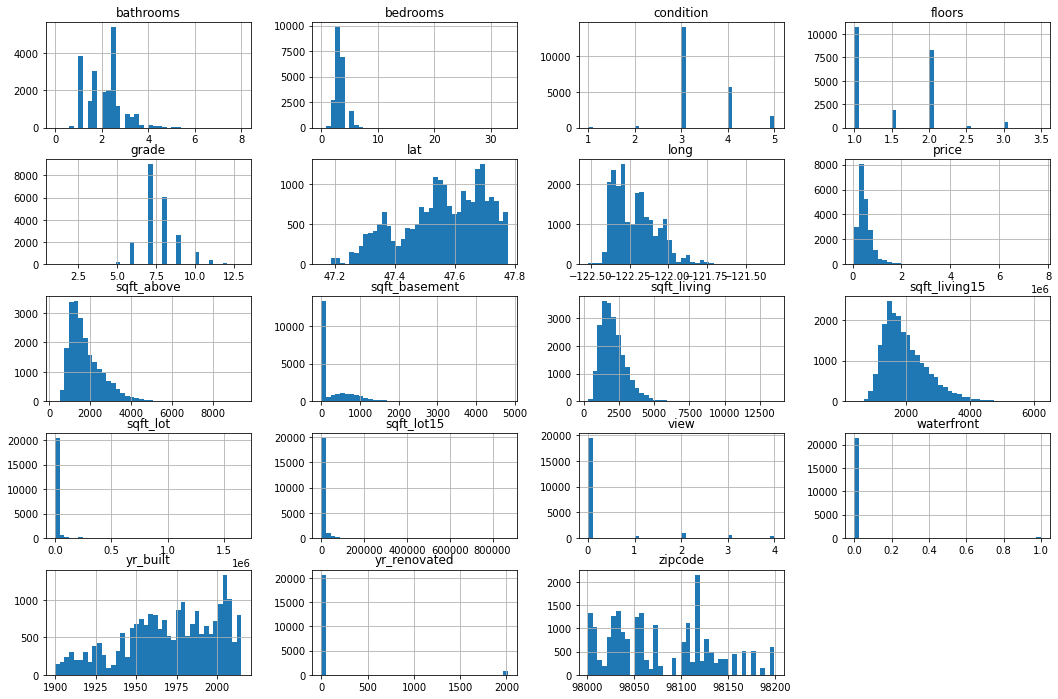

In [186]:
# histogams for all numerical variables 
a.hist(bins=40, figsize=(18,12))
plt.show()

In [187]:
#skewness and kurtosis
print("Skewness: " + str(a['price'].skew()))
print("Kurtosis: " + str(a['price'].kurt()))

Skewness: 4.021354631513139
Kurtosis: 34.51538421151693


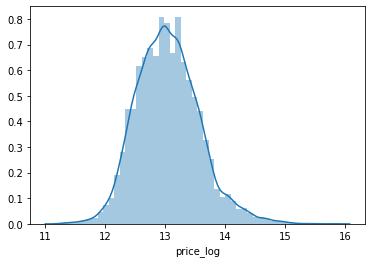

In [188]:
# we need to normalize the price by finding the log of the price column
a['price_log'] = np.log(a['price'])

# Plot the distribution plot
sns.distplot(a['price_log']);

In [190]:

# Check skewness and kurtosis
print("Skewness: %f" % a['price_log'].skew())
print("Kurtosis: %f" % a['price_log'].kurt())

# dropping price column
a.drop('price', axis= 1, inplace=True)

Skewness: 0.429058
Kurtosis: 0.692182


## Bivariate analysis 

In [192]:
a.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
bedrooms,1.000000,0.515956,0.576640,0.031671,0.175608,-0.006591,0.079411,0.028370,0.357143,0.477569,0.303093,0.154410,0.018678,-0.152683,-0.008970,0.129395,0.391571,0.029197,0.343535
bathrooms,0.515956,1.000000,0.754717,0.087751,0.500754,0.063747,0.187892,-0.124941,0.665029,0.685376,0.283824,0.506038,0.050880,-0.203837,0.024587,0.223065,0.568692,0.087192,0.550829
sqft_living,0.576640,0.754717,1.000000,0.172809,0.354181,0.103817,0.284627,-0.058825,0.762893,0.876593,0.435061,0.318253,0.055299,-0.199396,0.052514,0.240150,0.756398,0.183258,0.695383
sqft_lot,0.031671,0.087751,0.172809,1.000000,-0.005113,0.021598,0.074744,-0.008988,0.113688,0.183508,0.015263,0.053154,0.007671,-0.129595,-0.085683,0.229530,0.144596,0.718552,0.099628
floors,0.175608,0.500754,0.354181,-0.005113,1.000000,0.023731,0.029383,-0.263728,0.458074,0.524117,-0.245646,0.489244,0.006193,-0.059153,0.049595,0.125592,0.280080,-0.011180,0.310617
waterfront,-0.006591,0.063747,0.103817,0.021598,0.023731,1.000000,0.401992,0.016648,0.082799,0.072076,0.080584,-0.026150,0.092949,0.030283,-0.014272,-0.041916,0.086466,0.030698,0.174605
view,0.079411,0.187892,0.284627,0.074744,0.029383,0.401992,1.000000,0.045819,0.251426,0.167642,0.276993,-0.053196,0.103203,0.084857,0.006047,-0.078598,0.280391,0.072566,0.346642
condition,0.028370,-0.124941,-0.058825,-0.008988,-0.263728,0.016648,0.045819,1.000000,-0.144599,-0.158273,0.174061,-0.361306,-0.060875,0.002998,-0.014975,-0.106590,-0.092920,-0.003449,0.039562
grade,0.357143,0.665029,0.762893,0.113688,0.458074,0.082799,0.251426,-0.144599,1.000000,0.756090,0.168483,0.446887,0.014396,-0.184875,0.114100,0.198496,0.713396,0.119319,0.703782
sqft_above,0.477569,0.685376,0.876593,0.183508,0.524117,0.072076,0.167642,-0.158273,0.756090,1.000000,-0.051932,0.424084,0.023217,-0.261132,-0.000837,0.343739,0.731846,0.194035,0.601806


# Regression Analysis

## a)Multiple Linear Regression

In [81]:
# Multiple Linear Regression
# Quantile Regression
# Ridge Regression
# Lasso Regression
# Elastic Net Regression

### Multicollinearity

In [193]:
# First we check for multicollinearity 

# displaying the correlation matrix of the data frame to show correlation btn variables 

corrs = a.corr()
corrs

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
bedrooms,1.000000,0.515956,0.576640,0.031671,0.175608,-0.006591,0.079411,0.028370,0.357143,0.477569,0.303093,0.154410,0.018678,-0.152683,-0.008970,0.129395,0.391571,0.029197,0.343535
bathrooms,0.515956,1.000000,0.754717,0.087751,0.500754,0.063747,0.187892,-0.124941,0.665029,0.685376,0.283824,0.506038,0.050880,-0.203837,0.024587,0.223065,0.568692,0.087192,0.550829
sqft_living,0.576640,0.754717,1.000000,0.172809,0.354181,0.103817,0.284627,-0.058825,0.762893,0.876593,0.435061,0.318253,0.055299,-0.199396,0.052514,0.240150,0.756398,0.183258,0.695383
sqft_lot,0.031671,0.087751,0.172809,1.000000,-0.005113,0.021598,0.074744,-0.008988,0.113688,0.183508,0.015263,0.053154,0.007671,-0.129595,-0.085683,0.229530,0.144596,0.718552,0.099628
floors,0.175608,0.500754,0.354181,-0.005113,1.000000,0.023731,0.029383,-0.263728,0.458074,0.524117,-0.245646,0.489244,0.006193,-0.059153,0.049595,0.125592,0.280080,-0.011180,0.310617
waterfront,-0.006591,0.063747,0.103817,0.021598,0.023731,1.000000,0.401992,0.016648,0.082799,0.072076,0.080584,-0.026150,0.092949,0.030283,-0.014272,-0.041916,0.086466,0.030698,0.174605
view,0.079411,0.187892,0.284627,0.074744,0.029383,0.401992,1.000000,0.045819,0.251426,0.167642,0.276993,-0.053196,0.103203,0.084857,0.006047,-0.078598,0.280391,0.072566,0.346642
condition,0.028370,-0.124941,-0.058825,-0.008988,-0.263728,0.016648,0.045819,1.000000,-0.144599,-0.158273,0.174061,-0.361306,-0.060875,0.002998,-0.014975,-0.106590,-0.092920,-0.003449,0.039562
grade,0.357143,0.665029,0.762893,0.113688,0.458074,0.082799,0.251426,-0.144599,1.000000,0.756090,0.168483,0.446887,0.014396,-0.184875,0.114100,0.198496,0.713396,0.119319,0.703782
sqft_above,0.477569,0.685376,0.876593,0.183508,0.524117,0.072076,0.167642,-0.158273,0.756090,1.000000,-0.051932,0.424084,0.023217,-0.261132,-0.000837,0.343739,0.731846,0.194035,0.601806


- A correlation of 1 across the main diagonal of the corrrelation  matrix actualy makes sense. The correlation matrix will then be used to plot the VIF
(Variance Infltion Factor) score for each variable.

In [194]:
# VIF 
VIF = pd.DataFrame(np.linalg.inv(corrs.values), index= corrs.index, columns= corrs.columns)
VIF



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
bedrooms,1.654052,-0.470897,-1.094752e+00,0.045854,0.042660,0.057361,0.106162,-0.057887,0.273482,9.104422e-02,2.939770e-02,0.152331,0.043160,0.086320,0.016296,0.021521,0.013319,0.086681,0.093857
bathrooms,-0.470897,3.395725,-1.811286e+00,-0.007773,-0.641633,0.036863,-0.003620,-0.103218,-0.112194,4.538196e-01,-1.497205e-01,-1.019398,-0.248084,0.012947,0.120897,0.035145,0.148482,0.065483,-0.439756
sqft_living,-1.093023,-1.813478,-1.600869e+13,-0.156245,0.574594,-0.397889,0.435253,-0.482823,-1.541416,1.443372e+13,7.714318e+12,0.584334,-0.121381,-0.314302,0.148520,0.008460,-0.920210,-0.092670,-0.385835
sqft_lot,0.045854,-0.007773,-1.564916e-01,2.108479,0.057663,0.037191,-0.044902,0.043021,0.003455,-2.378070e-02,5.334465e-02,0.068062,0.025830,-0.013160,0.112743,-0.140073,0.184592,-1.461463,-0.161333
floors,0.042660,-0.641633,5.732917e-01,0.057663,2.037785,0.014949,-0.010524,0.115894,-0.110609,-9.501735e-01,3.814320e-01,-0.544846,-0.070501,-0.192815,-0.003811,0.149692,0.315436,0.068153,-0.336116
waterfront,0.057361,0.036863,-3.981422e-01,0.037191,0.014949,1.220118,-0.469485,0.007729,0.143438,3.036117e-01,2.219105e-01,-0.071546,-0.058394,0.005164,0.107505,0.015958,0.088398,-0.022063,-0.265288
view,0.106162,-0.003620,4.354434e-01,-0.044902,-0.010524,-0.469485,1.469135,0.008608,-0.049171,-2.710548e-01,-4.174525e-01,0.078628,-0.028332,-0.165813,0.260018,0.055637,-0.276103,-0.012660,-0.383886
condition,-0.057887,-0.103218,-4.836374e-01,0.043021,0.115894,0.007729,0.008608,1.275607,0.065317,5.635644e-01,1.784162e-01,0.497266,0.216398,0.139135,0.188035,-0.021243,0.119184,-0.032798,-0.337567
grade,0.273482,-0.112194,-1.538745e+00,0.003455,-0.110609,0.143438,-0.049171,0.065317,3.967406,1.066963e-01,4.518400e-01,-0.932467,-0.027966,-0.018254,0.238450,0.327584,-0.713892,0.051038,-1.546613
sqft_above,0.090393,0.456354,1.443372e+13,-0.024029,-0.951385,0.303412,-0.270933,0.562921,0.109122,-1.301370e+13,-6.955366e+12,-0.184530,0.134449,0.146659,0.390222,-0.388586,-0.585928,-0.104799,-0.583335


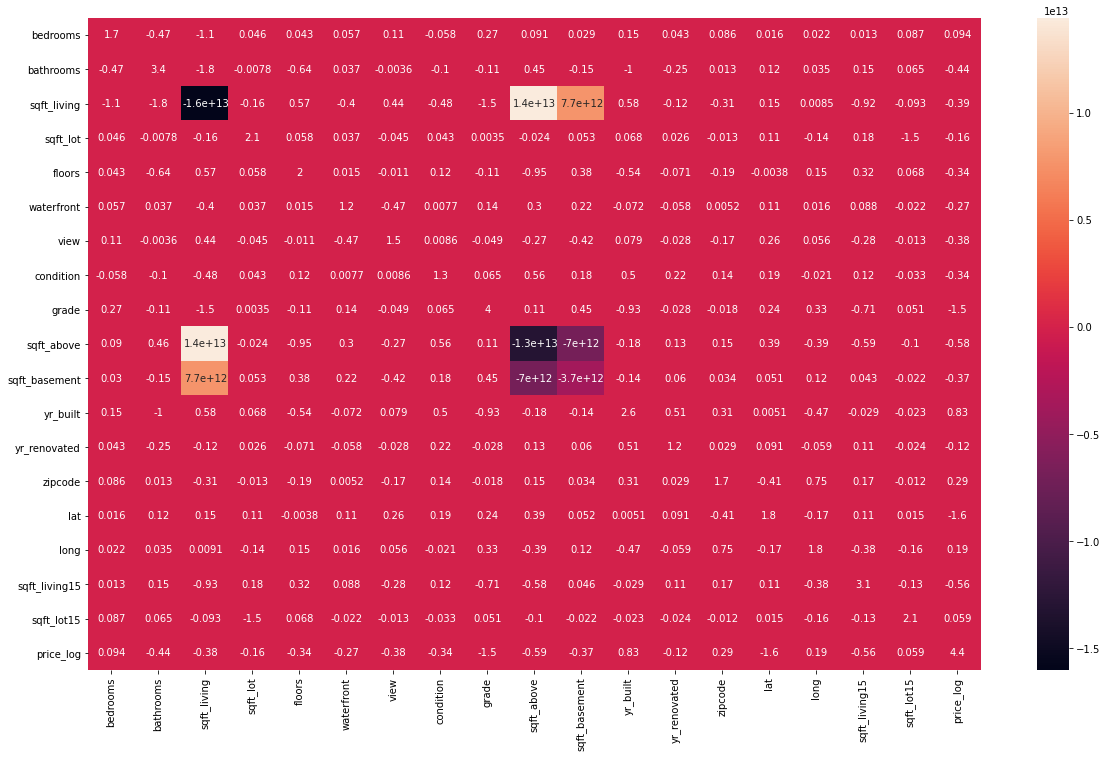

In [196]:
plt.figure(figsize = (20, 12))
sns.heatmap(VIF, annot = True)
plt.show()

- All scores are less than 5 which indicates a rather good scoring. However, bathrooms and grade have the highest VIF scores of 3.4 and 3.7 respectively which are the highest VIF scores


In [212]:
# Multiple regression model 
X = a.drop(columns=['price_log'], axis =1)
Y = a['price_log']
# splitting the model into test and train sets

x_test, x_train, y_test, y_train = train_test_split(X, Y, test_size=0.5
                                                    , random_state= 0)

# fitting the model 
regressor = LinearRegression()
regressor.fit(x_train, y_train)

#drop(columns = ['price_log'], axis=1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [213]:
# maaking predictions 
y_pred= regressor.predict(x_train)

# creating a dataframe for the actual and the predicted
a_df = pd.DataFrame({'Actual': y_test, 'predicetd': y_pred})
a_df

,Actual,predicetd
21160,12.936034,12.200760
7241,12.660328,12.799626
1643,12.380026,13.106874
4003,12.419166,13.076932
15650,12.417953,13.524234
...,...,...
13125,12.456442,14.152552
19651,12.674513,13.411974
9847,13.384728,12.596663
10801,12.985398,12.809764


In [214]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5507396910220971
Mean Squared Error: 0.4881424657550284
Root Mean Squared Error: 0.6986719299893395


In [218]:
# Test and Training Scores
score1= regressor.score(x_train, y_train)
score2 = regressor.score(x_test, y_test)

print('Training set accuracy: ', '%.5f'%(score1))
print('Test set accuracy: ', '%.5f'%(score2))

Training set accuracy:  0.77295
Test set accuracy:  0.76750


### cross validation

In [231]:
scores = cross_val_score(regressor, X, Y, scoring = 'neg_mean_squared_error', cv = 5
                         )

print("AUC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 4))


AUC: -0.06 (+/- 0.00)


From the above  it can be seen the model is fairly stable, as it varies only by 0.06, from the mean

## b)Ridge Regression


In [235]:

from sklearn.linear_model import Ridge
ridge = Ridge()
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}



In [236]:
# cross validation
folds = 10
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(x_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    3.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [237]:

print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 0.8}
-0.19490316580246297


- The best alpha is 0.8

In [238]:

alpha = .8
ridge = Ridge(alpha=alpha)

ridge.fit(x_train, y_train)

Ridge(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [239]:

print("Training set score: {:.5f}".format(ridge.score(x_train, y_train)))
print("Test set score: {:.5f}".format(ridge.score(x_test, y_test)))

Training set score: 0.77295
Test set score: 0.76748


## c)Lasso Regression

In [241]:
from sklearn.linear_model import Ridge
lasso = Lasso()
folds = 10



In [242]:
# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(x_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   13.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [243]:

print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.1948670574942561


In [244]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [246]:

print("Training set score: {:.5f}".format(lasso.score(x_train, y_train)))
print("Test set score: {:.5f}".format(lasso.score(x_test, y_test)))

Training set score: 0.77294
Test set score: 0.76745


## d)ElasticNet Regression

In [250]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet


elastic = ElasticNet()
folds = 10

In [251]:
# cross validation
elastic_model_cv = GridSearchCV(estimator = elastic, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

elastic_model_cv.fit(x_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   15.4s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [252]:
print(elastic_model_cv.best_params_)
print(elastic_model_cv.best_score_)

{'alpha': 0.0001}
-0.19488501297246302


In [254]:

# The best hyperparameters was an alpha set to 0.0001
# 
alpha = 0.0001
elastic = ElasticNet(alpha=alpha)

elastic.fit(x_train, y_train)

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [257]:

print("Training set score: {:.5f}".format(elastic.score(x_train, y_train)))
print("Test set score: {:.5f}".format(elastic.score(x_test, y_test)))

Training set score: 0.77294
Test set score: 0.76746


## e)Quantile regression

In [260]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.formula.api as sm
from statsmodels.regression.quantile_regression import QuantReg

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
sc = StandardScaler()
y_train1 = sc.fit_transform(y_train.values.reshape(-1,1))
y_test1 = sc.transform(y_test.values.reshape(-1,1))

In [261]:
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(x_train)
principalComponentsTest = pca.transform(x_test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])
principalDftest = pd.DataFrame(data = principalComponentsTest
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])

In [262]:

principalDf['price_log'] = y_train1

In [263]:
mod = sm.quantreg('price_log ~ PrincComp_1 + PrincComp_2 + PrincComp_3 + PrincComp_4 + PrincComp_5', principalDf)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:              price_log   Pseudo R-squared:               0.2715
Model:                       QuantReg   Bandwidth:                      0.1686
Method:                 Least Squares   Sparsity:                        1.925
Date:                Mon, 03 Aug 2020   No. Observations:                10804
Time:                        05:41:35   Df Residuals:                    10798
                                        Df Model:                            5
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0246      0.009      2.661      0.008       0.006       0.043
PrincComp_1   2.04e-06   1.89e-07     10.808      0.000    1.67e-06    2.41e-06
PrincComp_2 -8.687e-07   4.96e-07     -1.752      0.080   -1.84e-06    1.03e-07
PrincComp_3     0.0005   7.08e-06     72.037   